## Tests for graph from DB

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sqlalchemy import create_engine
from sqlalchemy.orm import Session

sys.path.append('../libraries')
from family_graph import build_Newick_tree, render_tree_view
from cells_database import Base, CellDB, TrackDB

In [2]:
new_db_path = r'D:\kasia\tracking\E6_exp\code\gardener_20_dev\cells_database_2tables.db'
engine = create_engine(f'sqlite:///{new_db_path}')

In [12]:
my_root = 1
#29763
# 75012	

tree = build_Newick_tree(engine, my_root)

In [13]:
tree.show()

In [14]:
t_rendering = tree.render('')

In [18]:
from family_graph import add_y_rendering
t= add_y_rendering(tree,t_rendering)

In [20]:
for n in t.traverse():
    if n.is_root():
        pass
    else:
        print(n.name,n.num,n.start,n.stop)

1 1 0 73
2 2 74 160
3 3 74 169


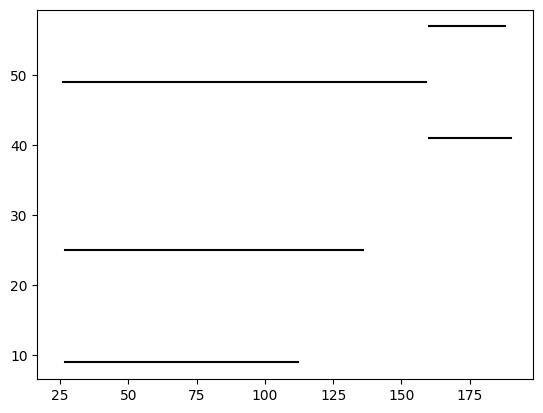

In [9]:
for n in tree2.traverse():

    if not n.is_root():
        
        # get position in time
        x1 = n.start
        x2 = n.stop
        x_signal = [x1,x2]

        y_signal = np.mean([t_rendering['node_areas'][n.num][1],
                            t_rendering['node_areas'][n.num][3]]).repeat(2)

        plt.plot(x_signal,y_signal,'k')

## Addtional tests

In [43]:
# get df for this root

my_root = 75012	

with Session(engine) as session:
    
    query = session.query(TrackDB).filter(TrackDB.root == my_root)
    df = pd.read_sql(query.statement, engine)

df

,track_id,parent_track_id,root,t_begin,t_end
0,75012,-1,75012,238,238
1,75013,75012,75012,239,240
2,75014,75012,75012,239,240


In [9]:
# to get an entire df
df = pd.read_sql_table('tracks', engine)

In [12]:
df

,track_id,parent_track_id,root,t_begin,t_end
0,1,-1,1,0,73
1,2,1,1,74,160
2,3,1,1,74,169
3,4,-1,4,0,154
4,5,-1,5,0,10
...,...,...,...,...,...
75013,75014,75012,75012,239,240
75014,75015,-1,75015,238,240
75015,75016,-1,75016,238,240
75016,75017,-1,75017,238,240


In [15]:
my_root = 29763

with Session(engine) as session:
    
    query = session.query(TrackDB).filter(TrackDB.root == my_root)
    df = pd.read_sql(query.statement, engine)

df

,track_id,parent_track_id,root,t_begin,t_end
0,29763,-1,29763,25,25
1,29764,29763,29763,26,26
2,29765,29764,29763,27,112
3,29766,29764,29763,27,136
4,29767,29763,29763,26,159
5,29768,29767,29763,160,190
6,29769,29767,29763,160,188
